# Connect to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Library Installation

In [ ]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.8 MB/s eta 0:00:00


In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.9 MB/s eta 0:00:00


In [ ]:
!pip install tqdm

In [ ]:
!pip install spacy

In [ ]:
!pip install reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.1 MB/s eta 0:00:00


# Import Library

In [ ]:
import pandas as pd

import PyPDF2
from PyPDF2 import PdfReader

import re

import nltk
from nltk.tokenize import word_tokenize

from tqdm import tqdm
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from reportlab.pdfgen import canvas

import os
from gensim import corpora, models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Load Data

In [ ]:
# Function to extract text from PDF
def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ''
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
    return text

In [ ]:
# Replace 'file_path_X.pdf' with the actual file paths of your uploaded PDFs
pdf_file_path_1 = '/content/drive/MyDrive/TKM/Anies Cak Imin.pdf'
pdf_file_path_2 = '/content/drive/MyDrive/TKM/Prabowo Gibran.pdf'
pdf_file_path_3 = '/content/drive/MyDrive/TKM/Ganjar Pranowo dan Mahfud MD.pdf'

In [ ]:
# Replace 'file_path_X.pdf' with the actual file paths of your uploaded PDFs
pdf_file_path_1 = '/content/drive/MyDrive/TKM/Anies Cak Imin.pdf'
pdf_file_path_2 = '/content/drive/MyDrive/TKM/Prabowo Gibran.pdf'
pdf_file_path_3 = '/content/drive/MyDrive/TKM/Ganjar Pranowo dan Mahfud MD.pdf'
# Extract text from PDFs
text1 = extract_text_from_pdf(pdf_file_path_1)
text2 = extract_text_from_pdf(pdf_file_path_2)
text3 = extract_text_from_pdf(pdf_file_path_3)

In [ ]:
text1

'VISI, MISI & PROGRAM KERJA\nIndonesia Adil \nMakmur untuk Semua\nANIES RASYID BASWEDAN ABDUL MUHAIMIN ISKANDARDaftar \nIsi1 2\nHAL. 2 HAL. 13VISI:\nINDONESIA ADIL\nMAKMUR UNTUK SEMUAFONDASI \nDAN ARAH \nPERUBAHAN3\n4 5 6 7MISI: \n8 JALAN \nPERUBAHAN\nAGENDA STRATEGIS\n8 SAYAP \nKEMAJUANAGENDA KHUSUS\n28 SIMPUL \nKESEJAHTERAANPENUTUPLAMPIRAN\nTARGET AMIN \n2025-2029MISI 1: Memastikan \nKetersediaan Kebutuhan Pokok \ndan Biaya Hidup Murah melalui \nKemandirian Pangan, Ketahanan \nEnergi, dan Kedaulatan Air\nMISI 2: Mengentaskan \nKemiskinan dengan Memperluas \nKesempatan Berusaha dan \nMenciptakan Lapangan Kerja, \nMewujudkan Upah Berkeadilan, \nMenjamin Kemajuan Ekonomi \nBerbasis Kemandirian dan \nPemerataan, serta Mendukung \nKorporasi Indonesia Berhasil di \nNegeri Sendiri dan Bertumbuh di \nKancah Global\nMISI 3: Mewujudkan Keadilan \nEkologis Berkelanjutan untuk \nGenerasi Mendatang\nMISI 4: Membangun Kota dan \nDesa Berbasis Kawasan yang \nManusiawi, Berkeadilan dan \nSaling Mema

In [ ]:
text2

'Calon Presiden dan Wakil Presiden 2024-2029\nH. Prabowo Subianto\nGibran Rakabuming RakaVisi, Misi dan Program\n20242\nVisi, Misi dan Program\nPrabowo - Gibran“Impian kami semua \nrakyat Indonesia \nmempunyai \npekerjaan yang layak,\n… semua kebutuhan \npokok terpenuhi \ndengan harga-harga \nyang terjangkau,... semua anak-anak \nbangsa kita bisa \nsekolah dan menuntut \nilmu terbaik dengan \nlancar,\n… semua petani bisa \ntersenyum karena \nharga jual produk \nmereka bagus,\n3\nVisi, Misi dan Program\nPrabowo - Gibran... semua guru tekun \nmencerdaskan \nbangsa dan hidupnya \ndijamin pemerintah,\n… semua pasien \nmendapatkan \npelayanan yang terbaik \ndi rumah sakit.”… semua buruh bisa \ntidur tenang karena \nmenerima penghasilan \nyang cukup,\n… polisi, jaksa, \nprajurit berjuang \ndengan gaji yang \nlayak dan keadaan \nhidup yang baik,\n4Visi, Misi dan Program\nPrabowo - GibranVisi\nBersama Indonesia Maju\nMenuju Indonesia Emas 2045\nFondasi Indonesia Maju oleh Presiden Joko Widodo\

In [ ]:
text3

'VISI DAN MISI\nCALON PRESIDEN & CALON WAKIL PRESIDEN\n2024-2029GANJAR PRANOWO & MAHFUD MD\nGERAK CEPAT MEWUJUDKAN NEGARA MARITIM\nYANG ADIL DAN LESTARIMENUJU\nINDONESIA UNGGULKETERSEDIAAN ANGGARAN PEMBERANTASAN KORUPSI DIGITALISASI BIROKRASIMEMPERCEPAT PEMBANGUNAN MANUSIA INDONESIA UNGGUL \nYANG BERKUALITAS, PRODUKTIF, DAN BERKEPRIBADIANMEMPERCEPAT PEMBANGUNAN SISTEM DIGITAL NASIONAL\nMEMPERCEPAT PENGUASAAN SAINS DAN TEKNOLOGI MELALUI \nPERCEPATAN RISET DAN INOVASI (R & I) BERDIKARIMEMPERCEPAT PERWUJUDAN LINGKUNGAN HIDUP YANG\nBERKELANJUTAN MELALUI EKONOMI HIJAU DAN BIRU\nMEMPERCEPAT PEMBANGUNAN EKONOMI BERDIKARI \nBERBASIS PENGETAHUAN DAN NILAI TAMBAHMEMPERCEPAT PELAKSANAAN DEMOKRASI SUBSTANTIF ,\nPENGHORMATAN HAM, SUPREMASI HUKUM YANG \nBERKEADILAN, DAN KEAMANAN YANG PROFESIONAL\nMEMPERCEPAT PENINGKATAN PERAN INDONESIA DALAM \nMEWUJUDKAN TATA DUNIA BARU YANG LEBIH BERKEADILAN \nMELALUI POLITIK LUAR NEGERI BEBAS AKTIF DAN \nMEMPERKUAT PERTAHANAN NEGARAMEMPERCEPAT PEMERATAAN PEMBANGUN

# Data Preprocessing

## Normalization

In [ ]:
def preprocess_text1(text):
    text = text.lower() # Ubah jadi lower case
    text = text.replace('\n', ' ') # Ubah newline ke space
    text = re.sub(r"[0-9]+", '', text) # Hapus angka
    text = re.sub(r'[^\w\s]', '', text) # Hapus tanda baca
    text = re.sub(r'\b\w{1,3}\b','',text) # Hapus text yang hanya terdiri dari 3 kata atau kurang

    # List of words to be removed (add more if needed)
    view_words = ['visi', 'misi', 'anies','muhaimin', 'rasyid', 'baswedan', 'abdul', 'iskandar']  # Replace with your specific words to be removed

    # Remove view words from the text
    text = ' '.join(word for word in text.split() if word.lower() not in view_words)

    # Add other text preprocessing steps here (e.g., lowercase, tokenization, etc.)
    return text

In [ ]:
def preprocess_text2(text):
    text = text.lower() # Ubah jadi lower case
    text = text.replace('\n', ' ') # Ubah newline ke space
    text = re.sub(r"[0-9]+", '', text) # Hapus angka
    text = re.sub(r'[^\w\s]', '', text) # Hapus tanda baca
    text = re.sub(r'\b\w{1,3}\b','',text) # Hapus text yang hanya terdiri dari 3 kata atau kurang

    # List of words to be removed
    view_words = ['visi', 'misi', 'prabowo','gibran','subianto', 'rakabuming', 'raka']  # Replace with your specific words to be removed

    # Remove view words from the text
    text = ' '.join(word for word in text.split() if word.lower() not in view_words)

    # Add other text preprocessing steps here (e.g., lowercase, tokenization, etc.)
    return text

In [ ]:
def preprocess_text3(text):
    text = text.lower() # Ubah jadi lower case
    text = text.replace('\n', ' ') # Ubah newline ke space
    text = re.sub(r"[0-9]+", '', text) # Hapus angka
    text = re.sub(r'[^\w\s]', '', text) # Hapus tanda baca
    text = re.sub(r'\b\w{1,3}\b','',text) # Hapus text yang hanya terdiri dari 3 kata atau kurang

    # List of words to be removed
    view_words = ['visi', 'misi', 'ganjar','mahfud', 'pranowo','md']  # Replace with your specific words to be removed

    # Remove view words from the text
    text = ' '.join(word for word in text.split() if word.lower() not in view_words)

    # Add other text preprocessing steps here (e.g., lowercase, tokenization, etc.)
    return text

In [ ]:
preprocess_text1 = preprocess_text1(text1)
preprocess_text2 = preprocess_text2(text2)
preprocess_text3 = preprocess_text3(text3)

In [ ]:
preprocess_text1

'program kerja indonesia adil makmur untuk semua iskandardaftar indonesia adil makmur untuk semuafondasi arah perubahan jalan perubahan agenda strategis sayap kemajuanagenda khusus simpul kesejahteraanpenutuplampiran target amin memastikan ketersediaan kebutuhan pokok biaya hidup murah melalui kemandirian pangan ketahanan energi kedaulatan mengentaskan kemiskinan dengan memperluas kesempatan berusaha menciptakan lapangan kerja mewujudkan upah berkeadilan menjamin kemajuan ekonomi berbasis kemandirian pemerataan serta mendukung korporasi indonesia berhasil negeri sendiri bertumbuh kancah global mewujudkan keadilan ekologis berkelanjutan untuk generasi mendatang membangun kota desa berbasis kawasan yang manusiawi berkeadilan saling memajukanmisi mewujudkan manusia indonesia yang sehat cerdas produktif berakhlak serta berbudaya mewujudkan keluarga indonesia yang sejahtera bahagia sebagai akar kekuatan bangsa memperkuat sistem pertahanan keamanan negara serta meningkatkan peran kepemimpina

In [ ]:
preprocess_text2

'calon presiden wakil presiden rakavisi program program gibranimpian kami semua rakyat indonesia mempunyai pekerjaan yang layak semua kebutuhan pokok terpenuhi dengan hargaharga yang terjangkau semua anakanak bangsa kita bisa sekolah menuntut ilmu terbaik dengan lancar semua petani bisa tersenyum karena harga jual produk mereka bagus program semua guru tekun mencerdaskan bangsa hidupnya dijamin pemerintah semua pasien mendapatkan pelayanan yang terbaik rumah sakit semua buruh bisa tidur tenang karena menerima penghasilan yang cukup polisi jaksa prajurit berjuang dengan gaji yang layak keadaan hidup yang baik program gibranvisi bersama indonesia maju menuju indonesia emas fondasi indonesia maju oleh presiden joko widodo para pemimpin negara indonesia keberlanjutan pembangunan menghadapi tantangan strategis bangsa indonesia prinsipprinsip ekonomi pancasila berdasarkan asta citaprogram prioritasprogram hasil terbaik cepatvisi program gibranbersama indonesia maju daftar isidaftar daftar pe

In [ ]:
preprocess_text3

'calon presiden calon wakil presiden gerak cepat mewujudkan negara maritim yang adil lestarimenuju indonesia unggulketersediaan anggaran pemberantasan korupsi digitalisasi birokrasimempercepat pembangunan manusia indonesia unggul yang berkualitas produktif berkepribadianmempercepat pembangunan sistem digital nasional mempercepat penguasaan sains teknologi melalui percepatan riset inovasi berdikarimempercepat perwujudan lingkungan hidup yang berkelanjutan melalui ekonomi hijau biru mempercepat pembangunan ekonomi berdikari berbasis pengetahuan nilai tambahmempercepat pelaksanaan demokrasi substantif penghormatan supremasi hukum yang berkeadilan keamanan yang profesional mempercepat peningkatan peran indonesia dalam mewujudkan tata dunia baru yang lebih berkeadilan melalui politik luar negeri bebas aktif memperkuat pertahanan negaramempercepat pemerataan pembangunan ekonomigerak cepat mewujudkan negara maritim yang adil lestarimenuju indonesia unggul daftar daftar pendahuluan persoalan p

In [ ]:
words_preprocess_text1 = preprocess_text1.split()
words_preprocess_text2 = preprocess_text2.split()
words_preprocess_text3 = preprocess_text3.split()

# Menampilkan hasil
count_words_preprocess_text1 = len(words_preprocess_text1)
count_words_preprocess_text2 = len(words_preprocess_text2)
count_words_preprocess_text3 = len(words_preprocess_text3)

print(f"Jumlah kata dalam Paslon 1: {count_words_preprocess_text1}")
print(f"Jumlah kata dalam Paslon 2: {count_words_preprocess_text2}")
print(f"Jumlah kata dalam Paslon 3: {count_words_preprocess_text3}")

Jumlah kata dalam Paslon 1: 20853
Jumlah kata dalam Paslon 2: 9967
Jumlah kata dalam Paslon 3: 5616


## Remove Stopword

In [ ]:
stopwords = ["dan", "untuk", "hal", "dari", "misi", "visi", "kerja", "program", "akan", "serta", "pada", "adalah", "ada","adalah","adanya","adapun","agak","agaknya","agar","akan","akankah","akhir","akhiri","akhirnya","aku","akulah","amat","amatlah","anda","andalah","antar","antara","antaranya","apa","apaan","apabila","apakah","apalagi","apatah","artinya","asal","asalkan","atas","atau","ataukah","ataupun","awal","awalnya","bagai","bagaikan","bagaimana","bagaimanakah","bagaimanapun","bagi","bagian","bahkan","bahwa","bahwasanya","baik","bakal","bakalan","balik","banyak","bapak","baru","bawah","beberapa","begini","beginian","beginikah","beginilah","begitu","begitukah","begitulah","begitupun","bekerja","belakang","belakangan","belum","belumlah","benar","benarkah","benarlah","berada","berakhir","berakhirlah","berakhirnya","berapa","berapakah","berapalah","berapapun","berarti","berawal","berbagai","berdatangan","beri","berikan","berikut","berikutnya","berjumlah","berkali-kali","berkata","berkehendak","berkeinginan","berkenaan","berlainan","berlalu","berlangsung","berlebihan","bermacam","bermacam-macam","bermaksud","bermula","bersama","bersama-sama","bersiap","bersiap-siap","bertanya","bertanya-tanya","berturut","berturut-turut","bertutur","berujar","berupa","besar","betul","betulkah","biasa","biasanya","bila","bilakah","bisa","bisakah","boleh","bolehkah","bolehlah","buat","bukan","bukankah","bukanlah","bukannya","bulan","bung","cara","caranya","cukup","cukupkah","cukuplah","cuma","dahulu","dalam","dan","dapat","dari","daripada","datang","dekat","demi","demikian","demikianlah","dengan","depan","di","dia","diakhiri","diakhirinya","dialah","diantara","diantaranya","diberi","diberikan","diberikannya","dibuat","dibuatnya","didapat","didatangkan","digunakan","diibaratkan","diibaratkannya","diingat","diingatkan","diinginkan","dijawab","dijelaskan","dijelaskannya","dikarenakan","dikatakan","dikatakannya","dikerjakan","diketahui","diketahuinya","dikira","dilakukan","dilalui","dilihat","dimaksud","dimaksudkan","dimaksudkannya","dimaksudnya","diminta","dimintai","dimisalkan","dimulai","dimulailah","dimulainya","dimungkinkan","dini","dipastikan","diperbuat","diperbuatnya","dipergunakan","diperkirakan","diperlihatkan","diperlukan","diperlukannya","dipersoalkan","dipertanyakan","dipunyai","diri","dirinya","disampaikan","disebut","disebutkan","disebutkannya","disini","disinilah","ditambahkan","ditandaskan","ditanya","ditanyai","ditanyakan","ditegaskan","ditujukan","ditunjuk","ditunjuki","ditunjukkan","ditunjukkannya","ditunjuknya","dituturkan","dituturkannya","diucapkan","diucapkannya","diungkapkan","dong","dua","dulu","empat","enggak","enggaknya","entah","entahlah","guna","gunakan","hal","hampir","hanya","hanyalah","hari","harus","haruslah","harusnya","hendak","hendaklah","hendaknya","hingga","ia","ialah","ibarat","ibaratkan","ibaratnya","ibu","ikut","ingat","ingat-ingat","ingin","inginkah","inginkan","ini","inikah","inilah","itu","itukah","itulah","jadi","jadilah","jadinya","jangan","jangankan","janganlah","jauh","jawab","jawaban","jawabnya","jelas","jelaskan","jelaslah","jelasnya","jika","jikalau","juga","jumlah","jumlahnya","justru","kala","kalau","kalaulah","kalaupun","kalian","kami","kamilah","kamu","kamulah","kan","kapan","kapankah","kapanpun","karena","karenanya","kasus","kata","katakan","katakanlah","katanya","ke","keadaan","kebetulan","kecil","kedua","keduanya","keinginan","kelamaan","kelihatan","kelihatannya","kelima","keluar","kembali","kemudian","kemungkinan","kemungkinannya","kenapa","kepada","kepadanya","kesampaian","keseluruhan","keseluruhannya","keterlaluan","ketika","khususnya","kini","kinilah","kira","kira-kira","kiranya","kita","kitalah","kok","kurang","lagi","lagian","lah","lain","lainnya","lalu","lama","lamanya","lanjut","lanjutnya","lebih","lewat","lima","luar","macam","maka","makanya","makin","malah","malahan","mampu","mampukah","mana","manakala","manalagi","masa","masalah","masalahnya","masih","masihkah","masing","masing-masing","mau","maupun","melainkan","melakukan","melalui","melihat","melihatnya","memang","memastikan","memberi","memberikan","membuat","memerlukan","memihak","meminta","memintakan","memisalkan","memperbuat","mempergunakan","memperkirakan","memperlihatkan","mempersiapkan","mempersoalkan","mempertanyakan","mempunyai","memulai","memungkinkan","menaiki","menambahkan","menandaskan","menanti","menanti-nanti","menantikan","menanya","menanyai","menanyakan","mendapat","mendapatkan","mendatang","mendatangi","mendatangkan","menegaskan","mengakhiri","mengapa","mengatakan","mengatakannya","mengenai","mengerjakan","mengetahui","menggunakan","menghendaki","mengibaratkan","mengibaratkannya","mengingat","mengingatkan","menginginkan","mengira","mengucapkan","mengucapkannya","mengungkapkan","menjadi","menjawab","menjelaskan","menuju","menunjuk","menunjuki","menunjukkan","menunjuknya","menurut","menuturkan","menyampaikan","menyangkut","menyatakan","menyebutkan","menyeluruh","menyiapkan","merasa","mereka","merekalah","merupakan","meski","meskipun","meyakini","meyakinkan","minta","mirip","misal","misalkan","misalnya","mula","mulai","mulailah","mulanya","mungkin","mungkinkah","nah","naik","namun","nanti","nantinya","nyaris","nyatanya","oleh","olehnya","pada","padahal","padanya","pak","paling","panjang","pantas","para","pasti","pastilah","penting","pentingnya","per","percuma","perlu","perlukah","perlunya","pernah","persoalan","pertama","pertama-tama","pertanyaan","pertanyakan","pihak","pihaknya","pukul","pula","pun","punya","rasa","rasanya","rata","rupanya","saat","saatnya","saja","sajalah","saling","sama","sama-sama","sambil","sampai","sampai-sampai","sampaikan","sana","sangat","sangatlah","satu","saya","sayalah","se","sebab","sebabnya","sebagai","sebagaimana","sebagainya","sebagian","sebaik","sebaik-baiknya","sebaiknya","sebaliknya","sebanyak","sebegini","sebegitu","sebelum","sebelumnya","sebenarnya","seberapa","sebesar","sebetulnya","sebisanya","sebuah","sebut","sebutlah","sebutnya","secara","secukupnya","sedang","sedangkan","sedemikian","sedikit","sedikitnya","seenaknya","segala","segalanya","segera","seharusnya","sehingga","seingat","sejak","sejauh","sejenak","sejumlah","sekadar","sekadarnya","sekali","sekali-kali","sekalian","sekaligus","sekalipun","sekarang","sekecil","seketika","sekiranya","sekitar","sekitarnya","sekurang-kurangnya","sekurangnya","sela","selagi","selain","selaku","selalu","selama","selama-lamanya","selamanya","selanjutnya","seluruh","seluruhnya","semacam","semakin","semampu","semampunya","semasa","semasih","semata","semata-mata","semaunya","sementara","semisal","semisalnya","sempat","semua","semuanya","semula","sendiri","sendirian","sendirinya","seolah","seolah-olah","seorang","sepanjang","sepantasnya","sepantasnyalah","seperlunya","seperti","sepertinya","sepihak","sering","seringnya","serta","serupa","sesaat","sesama","sesampai","sesegera","sesekali","seseorang","sesuatu","sesuatunya","sesudah","sesudahnya","setelah","setempat","setengah","seterusnya","setiap","setiba","setibanya","setidak-tidaknya","setidaknya","setinggi","seusai","sewaktu","siap","siapa","siapakah","siapapun","sini","sinilah","soal","soalnya","suatu","sudah","sudahkah","sudahlah","supaya","tadi","tadinya","tahu","tahun","tak","tambah","tambahnya","tampak","tampaknya","tandas","tandasnya","tanpa","tanya","tanyakan","tanyanya","tapi","tegas","tegasnya","telah","tempat","tengah","tentang","tentu","tentulah","tentunya","tepat","terakhir","terasa","terbanyak","terdahulu","terdapat","terdiri","terhadap","terhadapnya","teringat","teringat-ingat","terjadi","terjadilah","terjadinya","terkira","terlalu","terlebih","terlihat","termasuk","ternyata","tersampaikan","tersebut","tersebutlah","tertentu","tertuju","terus","terutama","tetap","tetapi","tiap","tiba","tiba-tiba","tidak","tidakkah","tidaklah","tiga","tinggi","toh","tunjuk","turut","tutur","tuturnya","ucap","ucapnya","ujar","ujarnya","umum","umumnya","ungkap","ungkapnya","untuk","usah","usai","waduh","wah","wahai","waktu","waktunya","walau","walaupun","wong","yaitu","yakin","yakni","yang"]

filtered_doc1 = ' '.join([word for word in preprocess_text1.split() if word not in stopwords])
filtered_doc2 = ' '.join([word for word in preprocess_text2.split() if word not in stopwords])
filtered_doc3 = ' '.join([word for word in preprocess_text3.split() if word not in stopwords])

In [ ]:
filtered_doc1

'indonesia adil makmur iskandardaftar indonesia adil makmur semuafondasi arah perubahan jalan perubahan agenda strategis sayap kemajuanagenda khusus simpul kesejahteraanpenutuplampiran target amin ketersediaan kebutuhan pokok biaya hidup murah kemandirian pangan ketahanan energi kedaulatan mengentaskan kemiskinan memperluas kesempatan berusaha menciptakan lapangan mewujudkan upah berkeadilan menjamin kemajuan ekonomi berbasis kemandirian pemerataan mendukung korporasi indonesia berhasil negeri bertumbuh kancah global mewujudkan keadilan ekologis berkelanjutan generasi membangun kota desa berbasis kawasan manusiawi berkeadilan memajukanmisi mewujudkan manusia indonesia sehat cerdas produktif berakhlak berbudaya mewujudkan keluarga indonesia sejahtera bahagia akar kekuatan bangsa memperkuat sistem pertahanan keamanan negara meningkatkan peran kepemimpinan indonesia kancah politik global mewujudkan kepentingan nasional perdamaian dunia memulihkan kualitas demokrasi menegakkan hukum member

In [ ]:
words_preprocess_text1 = filtered_doc1.split()
words_preprocess_text2 = filtered_doc2.split()
words_preprocess_text3 = filtered_doc3.split()

# Menampilkan hasil
count_words_preprocess_text1 = len(words_preprocess_text1)
count_words_preprocess_text2 = len(words_preprocess_text2)
count_words_preprocess_text3 = len(words_preprocess_text3)

print(f"Jumlah kata dalam Paslon 1: {count_words_preprocess_text1}")
print(f"Jumlah kata dalam Paslon 2: {count_words_preprocess_text2}")
print(f"Jumlah kata dalam Paslon 3: {count_words_preprocess_text3}")

Jumlah kata dalam Paslon 1: 15084
Jumlah kata dalam Paslon 2: 7333
Jumlah kata dalam Paslon 3: 4221


## Tokenizing

In [ ]:
tokens_doc1 = word_tokenize(filtered_doc1)
tokens_doc2 = word_tokenize(filtered_doc2)
tokens_doc3 = word_tokenize(filtered_doc3)

## Stemming

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

stemmed_doc1 = [stemmer.stem(word) for word in tqdm(tokens_doc1)]
stemmed_doc2 = [stemmer.stem(word) for word in tqdm(tokens_doc2)]
stemmed_doc3 = [stemmer.stem(word) for word in tqdm(tokens_doc3)]

100%|██████████| 4221/4221 [00:29<00:00, 144.57it/s]


In [ ]:
final1 = ' '.join(stemmed_doc1)
final2 = ' '.join(stemmed_doc2)
final3 = ' '.join(stemmed_doc3)

In [ ]:
final3

In [ ]:
words_preprocess_text1 = final1.split()
words_preprocess_text2 = final2.split()
words_preprocess_text3 = final3.split()

# Menampilkan hasil
count_words_preprocess_text1 = len(words_preprocess_text1)
count_words_preprocess_text2 = len(words_preprocess_text2)
count_words_preprocess_text3 = len(words_preprocess_text3)

print(f"Jumlah kata dalam Paslon 1: {count_words_preprocess_text1}")
print(f"Jumlah kata dalam Paslon 2: {count_words_preprocess_text2}")
print(f"Jumlah kata dalam Paslon 3: {count_words_preprocess_text3}")

NameError: ignored

# Save Cleaned Data

In [ ]:
import pandas as pd
document = pd.DataFrame({"Paslon1":[final1], "Paslon2":[final2], "Paslon3":[final3]})
document

,Paslon1,Paslon2,Paslon3
0,indonesia adil makmur iskandardaftar indonesia...,calon presiden wakil presiden rakavisi gibrani...,calon presiden calon wakil presiden gerak cepa...


In [ ]:
document.to_excel('All_PASLON.xlsx')

# Call Cleaned Data


In [ ]:
# Function to extract text from PDF
def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ''
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
    return text

In [ ]:
# Replace 'file_path_X.pdf' with the actual file paths of your uploaded PDFs
path_1 = '/content/Amin.pdf'
path_2 = '/content/Prabowo Gibran.pdf'
path_3 = '/content/Ganjar Mahmud.pdf'
# Extract text from PDFs
paslon1 = extract_text_from_pdf(path_1)
paslon2 = extract_text_from_pdf(path_2)
paslon3 = extract_text_from_pdf(path_3)

In [ ]:
df = pd.read_excel('/content/All_PASLON.xlsx')
df

,Unnamed: 0,Paslon1,Paslon2,Paslon3
0,teks,indonesia adil makmur daftar indonesia adil ma...,impian rakyat indonesia kerja layak butuh poko...,gerak cepat wujud negara maritim adil lestari ...


In [ ]:
paslon1 = df['Paslon1']
paslon2 = df['Paslon2']
paslon3 = df['Paslon3']

## Normalization

In [ ]:
def preprocess1(text):
    text = text.lower() # Ubah jadi lower case
    text = text.replace('\n', ' ') # Ubah newline ke space
    text = re.sub(r"[0-9]+", '', text) # Hapus angka
    text = re.sub(r'[^\w\s]', '', text) # Hapus tanda baca
    text = re.sub(r'\b\w{1,3}\b','',text) # Hapus text yang hanya terdiri dari 3 kata atau kurang

    # List of words to be removed (add more if needed)
    view_words = ['visi', 'misi', 'anies','muhaimin', 'rasyid', 'baswedan', 'abdul', 'iskandar']  # Replace with your specific words to be removed

    # Remove view words from the text
    text = ' '.join(word for word in text.split() if word.lower() not in view_words)

    # Add other text preprocessing steps here (e.g., lowercase, tokenization, etc.)
    return text

In [ ]:
def preprocess2(text):
    text = text.lower() # Ubah jadi lower case
    text = text.replace('\n', ' ') # Ubah newline ke space
    text = re.sub(r"[0-9]+", '', text) # Hapus angka
    text = re.sub(r'[^\w\s]', '', text) # Hapus tanda baca
    text = re.sub(r'\b\w{1,3}\b','',text) # Hapus text yang hanya terdiri dari 3 kata atau kurang

    # List of words to be removed
    view_words = ['visi', 'misi', 'prabowo','gibran','subianto', 'rakabuming', 'raka']  # Replace with your specific words to be removed

    # Remove view words from the text
    text = ' '.join(word for word in text.split() if word.lower() not in view_words)

    # Add other text preprocessing steps here (e.g., lowercase, tokenization, etc.)
    return text

In [ ]:
def preprocess3(text):
    text = text.lower() # Ubah jadi lower case
    text = text.replace('\n', ' ') # Ubah newline ke space
    text = re.sub(r"[0-9]+", '', text) # Hapus angka
    text = re.sub(r'[^\w\s]', '', text) # Hapus tanda baca
    text = re.sub(r'\b\w{1,3}\b','',text) # Hapus text yang hanya terdiri dari 3 kata atau kurang

    # List of words to be removed
    view_words = ['visi', 'misi', 'ganjar','mahfud', 'pranowo','md']  # Replace with your specific words to be removed

    # Remove view words from the text
    text = ' '.join(word for word in text.split() if word.lower() not in view_words)

    # Add other text preprocessing steps here (e.g., lowercase, tokenization, etc.)
    return text

In [ ]:
paslon1 = preprocess1(paslon1)
paslon2 = preprocess2(paslon2)
paslon3 = preprocess3(paslon3)

# Stopword

In [ ]:
stopwords2 = ["calon", "presiden", "wakil"]

paslon1 = ' '.join([word for word in paslon1.split() if word not in stopwords2])
paslon2 = ' '.join([word for word in paslon2.split() if word not in stopwords2])
paslon3 = ' '.join([word for word in paslon3.split() if word not in stopwords2])

# Visualization

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

## Top Words

In [ ]:
# Function to get top n words and their frequencies
def get_top_words(text, n=10):
    words = text.split()
    word_freq = Counter(words)
    top_words = dict(word_freq.most_common(n))
    return top_words

In [ ]:
# top_words_doc1 = get_top_words((paslon1), 10)
# top_words_doc2 = get_top_words((paslon2), 10)
# top_words_doc3 = get_top_words((paslon3), 10)

top_words_doc1 = paslon1.str.split().explode().value_counts().head(10)
top_words_doc2 = paslon2.str.split().explode().value_counts().head(10)
top_words_doc3 = paslon3.str.split().explode().value_counts().head(10)

In [ ]:
def plot_top_words(top_words, doc_name):
    plt.figure(figsize=(8, 6))
    plt.barh(list(top_words.keys()), list(top_words.values()), color='skyblue')
    plt.xlabel('Frequency')
    plt.title(f'Top 10 Words in {doc_name}')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:
plot_top_words(top_words_doc1, 'Document 1')

TypeError: ignored

<Figure size 800x600 with 0 Axes>

In [ ]:
plot_top_words(top_words_doc2, 'Document 2')

In [ ]:
plot_top_words(top_words_doc3, 'Document 3')

# Top Word

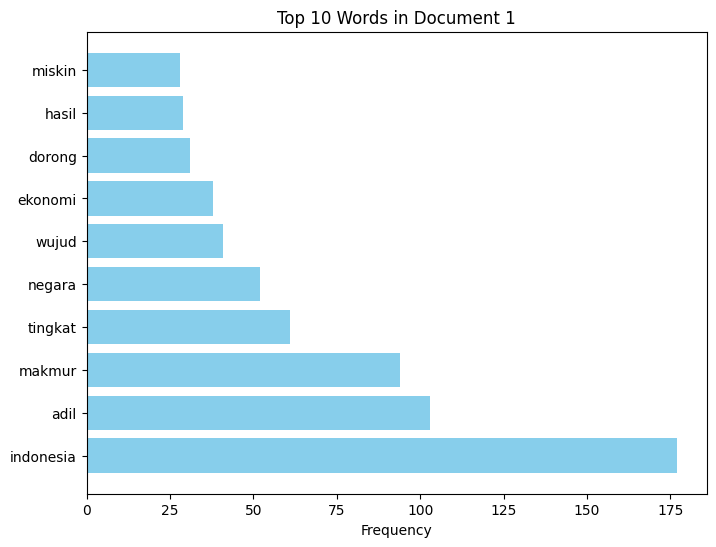

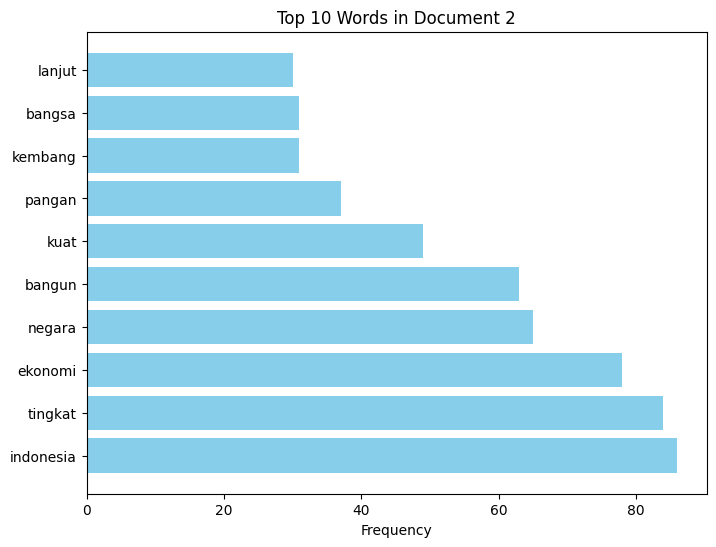

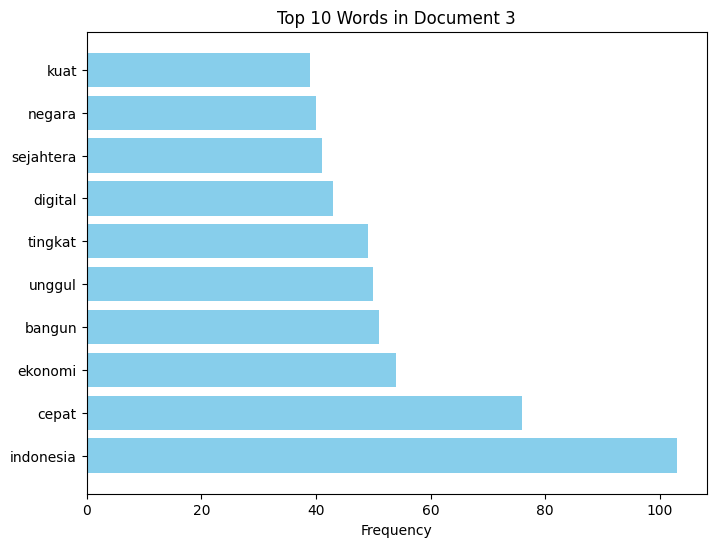

In [ ]:
def plot_top_words(top_words, doc_name):
    plt.figure(figsize=(8, 6))
    plt.barh(list(top_words.keys()), list(top_words.values), color='skyblue')  # Remove the parentheses after values
    plt.xlabel('Frequency')
    plt.title(f'Top 10 Words in {doc_name}')
    plt.show()

# Assuming top_words_doc1 is a dictionary obtained from your analysis
plot_top_words(top_words_doc1, 'Document 1')
plot_top_words(top_words_doc2, 'Document 2')
plot_top_words(top_words_doc3, 'Document 3')

## Word Cloud

In [ ]:
# Create word cloud function
def generate_word_cloud(text, doc_name):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {doc_name}')
    plt.show()

In [ ]:
generate_word_cloud((paslon1), 'Document 1')

In [ ]:
generate_word_cloud((paslon2), 'Document 2')

In [ ]:
generate_word_cloud((paslon3), 'Document 3')

# Counting Word

## Before Stopword Removed

In [ ]:
words_preprocess_text1 = preprocess_text1.split()
words_preprocess_text2 = preprocess_text2.split()
words_preprocess_text3 = preprocess_text3.split()

# Menampilkan hasil
count_words_preprocess_text1 = len(words_preprocess_text1)
count_words_preprocess_text2 = len(words_preprocess_text2)
count_words_preprocess_text3 = len(words_preprocess_text3)

print(f"Jumlah kata dalam Paslon 1: {count_words_preprocess_text1}")
print(f"Jumlah kata dalam Paslon 2: {count_words_preprocess_text2}")
print(f"Jumlah kata dalam Paslon 3: {count_words_preprocess_text3}")

Jumlah kata dalam Paslon 1: 20853
Jumlah kata dalam Paslon 2: 9967
Jumlah kata dalam Paslon 3: 5616


## After Stopword Removed

In [ ]:
count_words_paslon1 = paslon1.split()
count_words_paslon2 = paslon2.split()
count_words_paslon3 = paslon3.split()

# Menampilkan hasil
count_words_paslon1 = len(count_words_paslon1)
count_words_paslon2 = len(count_words_paslon2)
count_words_paslon3 = len(count_words_paslon3)
print(f"Jumlah kata dalam Paslon 1: {count_words_paslon1}")
print(f"Jumlah kata dalam Paslon 2: {count_words_paslon2}")
print(f"Jumlah kata dalam Paslon 3: {count_words_paslon3}")

Jumlah kata dalam Paslon 1: 14439
Jumlah kata dalam Paslon 2: 9689
Jumlah kata dalam Paslon 3: 4066


# Counting Distinct Word

## Before Stopword Removed

In [ ]:
unique_words_preprocess_text1 = set(word.lower() for word in preprocess_text1.split())
unique_words_preprocess_text2 = set(word.lower() for word in preprocess_text2.split())
unique_words_preprocess_text3 = set(word.lower() for word in preprocess_text3.split())

# Menampilkan hasil
count_unique_words_preprocess_text1 = len(unique_words_preprocess_text1)
count_unique_words_preprocess_text2 = len(unique_words_preprocess_text2)
count_unique_words_preprocess_text3 = len(unique_words_preprocess_text3)

print(f"Jumlah kosa kata dalam Paslon 1: {count_unique_words_preprocess_text1}")
print(f"Jumlah kosa kata dalam Paslon 2: {count_unique_words_preprocess_text2}")
print(f"Jumlah kosa kata dalam Paslon 3: {count_unique_words_preprocess_text3}")

Jumlah kosa kata dalam Paslon 1: 3345
Jumlah kosa kata dalam Paslon 2: 2310
Jumlah kosa kata dalam Paslon 3: 1535


## After Stopword Removed

In [ ]:
unique_words_paslon1 = set(word.lower() for paslon in paslon1 for word in paslon.split())
unique_words_paslon2 = set(word.lower() for paslon in paslon2 for word in paslon.split())
unique_words_paslon3 = set(word.lower() for paslon in paslon3 for word in paslon.split())

count_unique_words_paslon1 = len(unique_words_paslon1)
count_unique_words_paslon2 = len(unique_words_paslon2)
count_unique_words_paslon3 = len(unique_words_paslon3)

print(f"Jumlah kosa kata dalam Paslon 1: {count_unique_words_paslon1}")
print(f"Jumlah kosa kata dalam Paslon 2: {count_unique_words_paslon2}")
print(f"Jumlah kosa kata dalam Paslon 3: {count_unique_words_paslon3}")

Jumlah kosa kata dalam Paslon 1: 26
Jumlah kosa kata dalam Paslon 2: 26
Jumlah kosa kata dalam Paslon 3: 25


# Counting words on each topic


## Lingkungan

### Before Stopword Removed

In [ ]:
keywords = ['lingkungan', 'ekologi', 'iklim', 'energi']

# Inisialisasi total keseluruhan untuk masing-masing Paslon
total_paslon1 = 0
total_paslon2 = 0
total_paslon3 = 0

for keyword in keywords:
    count_paslon1 = preprocess_text1.lower().count(keyword)
    count_paslon2 = preprocess_text2.lower().count(keyword)
    count_paslon3 = preprocess_text3.lower().count(keyword)
    # Jumlahkan tiap keyword masing-masing paslon
    total_paslon1 += count_paslon1
    total_paslon2 += count_paslon2
    total_paslon3 += count_paslon3

    print(keyword)
    print(f"Paslon 1: {count_paslon1}")
    print(f"Paslon 2: {count_paslon2}")
    print(f"Paslon 3: {count_paslon3}\n")

# Tampilkan total keseluruhan
print("Total Keseluruhan:")
print(f"Paslon 1: {total_paslon1}")
print(f"Paslon 2: {total_paslon2}")
print(f"Paslon 3: {total_paslon3}")

lingkungan
Paslon 1: 48
Paslon 2: 14
Paslon 3: 22

ekologi
Paslon 1: 11
Paslon 2: 1
Paslon 3: 1

iklim
Paslon 1: 20
Paslon 2: 5
Paslon 3: 9

energi
Paslon 1: 31
Paslon 2: 25
Paslon 3: 15

Total Keseluruhan:
Paslon 1: 110
Paslon 2: 45
Paslon 3: 47


#### Persentase

In [ ]:
print("Persentasi Keseluruhan Lingkungan:")
print(f"Paslon 1: {total_paslon1/count_words_preprocess_text1 * 100}")
print(f"Paslon 2: {total_paslon2/count_words_preprocess_text2 * 100}")
print(f"Paslon 3: {total_paslon3/count_words_preprocess_text3 * 100}")

Persentasi Keseluruhan Lingkungan:
Paslon 1: 0.5275020380760562
Paslon 2: 0.4514899167251931
Paslon 3: 0.836894586894587


### After Stopword Removed

In [ ]:
keywords = ['lingkung', 'ekologi', 'iklim', 'energi']

# Inisialisasi total keseluruhan untuk masing-masing Paslon
total_count_paslon1 = 0
total_count_paslon2 = 0
total_count_paslon3 = 0

for keyword in keywords:
    count_paslon1 = paslon1.lower().count(keyword)
    count_paslon2 = paslon2.lower().count(keyword)
    count_paslon3 = paslon3.lower().count(keyword)
    # Jumlahkan tiap keyword masing-masing paslon
    total_count_paslon1 += count_paslon1
    total_count_paslon2 += count_paslon2
    total_count_paslon3 += count_paslon3

    print(keyword)
    print(f"Paslon 1: {count_paslon1}")
    print(f"Paslon 2: {count_paslon2}")
    print(f"Paslon 3: {count_paslon3}\n")

# Tampilkan total keseluruhan
print("Total Keseluruhan:")
print(f"Paslon 1: {total_count_paslon1}")
print(f"Paslon 2: {total_count_paslon2}")
print(f"Paslon 3: {total_count_paslon3}")

lingkung
Paslon 1: 47
Paslon 2: 14
Paslon 3: 22

ekologi
Paslon 1: 11
Paslon 2: 1
Paslon 3: 1

iklim
Paslon 1: 20
Paslon 2: 5
Paslon 3: 10

energi
Paslon 1: 31
Paslon 2: 25
Paslon 3: 15

Total Keseluruhan:
Paslon 1: 109
Paslon 2: 45
Paslon 3: 48


#### Persentase

In [ ]:
print("Persentasi Keseluruhan:")
print(f"Paslon 1: {total_count_paslon1/count_words_paslon1 * 100}")
print(f"Paslon 2: {total_count_paslon2/count_words_paslon2 * 100}")
print(f"Paslon 3: {total_count_paslon3/count_words_paslon3 * 100}")

Persentasi Keseluruhan:
Paslon 1: 0.7548999238174389
Paslon 2: 0.46444421508927647
Paslon 3: 1.1805213969503197


## Pendidikan

### Before Stopword Removed

In [ ]:
keywords = ['kurikulum', 'digitalisasi', 'pendidikan']

# Inisialisasi total keseluruhan untuk masing-masing Paslon
total_paslon1 = 0
total_paslon2 = 0
total_paslon3 = 0

for keyword in keywords:
    # Pemisahan kata-kata dalam keyword
    keyword_parts = keyword.split()

    # Inisialisasi hitungan untuk masing-masing Paslon
    count_paslon1 = 0
    count_paslon2 = 0
    count_paslon3 = 0

    # Iterasi melalui setiap kata dalam keyword
    for keyword_part in keyword_parts:
        # Hitung kemunculan kata atau frasa dalam teks masing-masing Paslon
        count_paslon1 += preprocess_text1.lower().count(keyword_part)
        count_paslon2 += preprocess_text2.lower().count(keyword_part)
        count_paslon3 += preprocess_text3.lower().count(keyword_part)

    # Jumlahkan tiap keyword atau frasa masing-masing paslon
    total_paslon1 += count_paslon1
    total_paslon2 += count_paslon2
    total_paslon3 += count_paslon3

    print(keyword)
    print(f"Paslon 1: {count_paslon1}")
    print(f"Paslon 2: {count_paslon2}")
    print(f"Paslon 3: {count_paslon3}\n")

# Tampilkan total keseluruhan
print("Total Keseluruhan:")
print(f"Paslon 1: {total_paslon1}")
print(f"Paslon 2: {total_paslon2}")
print(f"Paslon 3: {total_paslon3}")

kurikulum
Paslon 1: 4
Paslon 2: 1
Paslon 3: 1

digitalisasi
Paslon 1: 9
Paslon 2: 7
Paslon 3: 10

pendidikan
Paslon 1: 110
Paslon 2: 38
Paslon 3: 10

Total Keseluruhan:
Paslon 1: 123
Paslon 2: 46
Paslon 3: 21


#### Persentase

In [ ]:
print("Persentasi Keseluruhan Pendidikan:")
print(f"Paslon 1: {total_paslon1/count_words_preprocess_text1 * 100}")
print(f"Paslon 2: {total_paslon2/count_words_preprocess_text2 * 100}")
print(f"Paslon 3: {total_paslon3/count_words_preprocess_text3 * 100}")

Persentasi Keseluruhan Pendidikan:
Paslon 1: 0.5898431880304992
Paslon 2: 0.461523025985753
Paslon 3: 0.37393162393162394


### After Stopword Removed

In [ ]:
keywords = ['kurikulum', 'digitalisasi', 'didik']

# Inisialisasi total keseluruhan untuk masing-masing Paslon
total_count_paslon1 = 0
total_count_paslon2 = 0
total_count_paslon3 = 0

for keyword in keywords:
    # Pemisahan kata-kata dalam keyword
    keyword_parts = keyword.split()

    # Inisialisasi hitungan untuk masing-masing Paslon
    count_paslon1 = 0
    count_paslon2 = 0
    count_paslon3 = 0

    # Iterasi melalui setiap kata dalam keyword
    for keyword_part in keyword_parts:
        # Hitung kemunculan kata atau frasa dalam teks masing-masing Paslon
        count_paslon1 += preprocess_text1.lower().count(keyword_part)
        count_paslon2 += preprocess_text2.lower().count(keyword_part)
        count_paslon3 += preprocess_text3.lower().count(keyword_part)

    # Jumlahkan tiap keyword atau frasa masing-masing paslon
    total_count_paslon1 += count_paslon1
    total_count_paslon2 += count_paslon2
    total_count_paslon3 += count_paslon3

    print(keyword)
    print(f"Paslon 1: {count_paslon1}")
    print(f"Paslon 2: {count_paslon2}")
    print(f"Paslon 3: {count_paslon3}\n")

# Tampilkan total keseluruhan
print("Total Keseluruhan:")
print(f"Paslon 1: {total_count_paslon1}")
print(f"Paslon 2: {total_count_paslon2}")
print(f"Paslon 3: {total_count_paslon3}")

kurikulum
Paslon 1: 4
Paslon 2: 1
Paslon 3: 1

digitalisasi
Paslon 1: 9
Paslon 2: 7
Paslon 3: 10

didik
Paslon 1: 112
Paslon 2: 38
Paslon 3: 10

Total Keseluruhan:
Paslon 1: 125
Paslon 2: 46
Paslon 3: 21


#### Persentase

In [ ]:
print("Persentasi Keseluruhan:")
print(f"Paslon 1: {total_count_paslon1/count_words_paslon1 * 100}")
print(f"Paslon 2: {total_count_paslon2/count_words_paslon2 * 100}")
print(f"Paslon 3: {total_count_paslon3/count_words_paslon3 * 100}")

Persentasi Keseluruhan:
Paslon 1: 0.8657109218089895
Paslon 2: 0.474765197646816
Paslon 3: 0.5164781111657648


## Ekonomi

### Before Stopword Removed

In [ ]:
keywords = ['pertumbuhan', 'kemiskinan', 'lapangan kerja']

# Inisialisasi total keseluruhan untuk masing-masing Paslon
total_paslon1 = 0
total_paslon2 = 0
total_paslon3 = 0

for keyword in keywords:
    # Pemisahan kata-kata dalam keyword
    keyword_parts = keyword.split()

    # Inisialisasi hitungan untuk masing-masing Paslon
    count_paslon1 = 0
    count_paslon2 = 0
    count_paslon3 = 0

    # Iterasi melalui setiap kata dalam keyword
    for keyword_part in keyword_parts:
        # Hitung kemunculan kata atau frasa dalam teks masing-masing Paslon
        count_paslon1 += preprocess_text1.lower().count(keyword_part)
        count_paslon2 += preprocess_text2.lower().count(keyword_part)
        count_paslon3 += preprocess_text3.lower().count(keyword_part)

    # Jumlahkan tiap keyword atau frasa masing-masing paslon
    total_paslon1 += count_paslon1
    total_paslon2 += count_paslon2
    total_paslon3 += count_paslon3

    print(keyword)
    print(f"Paslon 1: {count_paslon1}")
    print(f"Paslon 2: {count_paslon2}")
    print(f"Paslon 3: {count_paslon3}\n")

# Tampilkan total keseluruhan
print("Total Keseluruhan:")
print(f"Paslon 1: {total_paslon1}")
print(f"Paslon 2: {total_paslon2}")
print(f"Paslon 3: {total_paslon3}")

pertumbuhan
Paslon 1: 22
Paslon 2: 26
Paslon 3: 9

kemiskinan
Paslon 1: 30
Paslon 2: 17
Paslon 3: 12

lapangan kerja
Paslon 1: 180
Paslon 2: 80
Paslon 3: 35

Total Keseluruhan:
Paslon 1: 232
Paslon 2: 123
Paslon 3: 56


#### Persentase

In [ ]:
print("Persentasi Keseluruhan Ekonomi:")
print(f"Paslon 1: {total_paslon1/count_words_preprocess_text1 * 100}")
print(f"Paslon 2: {total_paslon2/count_words_preprocess_text2 * 100}")
print(f"Paslon 3: {total_paslon3/count_words_preprocess_text3 * 100}")

Persentasi Keseluruhan Ekonomi:
Paslon 1: 1.1125497530331367
Paslon 2: 1.2340724390488613
Paslon 3: 0.9971509971509971


### After Stopword Removed

In [ ]:
keywords = ['pertumbuhan', 'kemiskinan', 'lapangan kerja']

# Inisialisasi total keseluruhan untuk masing-masing Paslon
total_count_paslon1 = 0
total_count_paslon2 = 0
total_count_paslon3 = 0

for keyword in keywords:
    # Pemisahan kata-kata dalam keyword
    keyword_parts = keyword.split()

    # Inisialisasi hitungan untuk masing-masing Paslon
    count_paslon1 = 0
    count_paslon2 = 0
    count_paslon3 = 0

    # Iterasi melalui setiap kata dalam keyword
    for keyword_part in keyword_parts:
        # Hitung kemunculan kata atau frasa dalam teks masing-masing Paslon
        count_paslon1 += preprocess_text1.lower().count(keyword_part)
        count_paslon2 += preprocess_text2.lower().count(keyword_part)
        count_paslon3 += preprocess_text3.lower().count(keyword_part)

    # Jumlahkan tiap keyword atau frasa masing-masing paslon
    total_count_paslon1 += count_paslon1
    total_count_paslon2 += count_paslon2
    total_count_paslon3 += count_paslon3

    print(keyword)
    print(f"Paslon 1: {count_paslon1}")
    print(f"Paslon 2: {count_paslon2}")
    print(f"Paslon 3: {count_paslon3}\n")

# Tampilkan total keseluruhan
print("Total Keseluruhan:")
print(f"Paslon 1: {total_count_paslon1}")
print(f"Paslon 2: {total_count_paslon2}")
print(f"Paslon 3: {total_count_paslon3}")

pertumbuhan
Paslon 1: 22
Paslon 2: 26
Paslon 3: 9

kemiskinan
Paslon 1: 30
Paslon 2: 17
Paslon 3: 12

lapangan kerja
Paslon 1: 180
Paslon 2: 80
Paslon 3: 35

Total Keseluruhan:
Paslon 1: 232
Paslon 2: 123
Paslon 3: 56


#### Persentase

In [ ]:
print("Persentasi Keseluruhan:")
print(f"Paslon 1: {total_count_paslon1/count_words_paslon1 * 100}")
print(f"Paslon 2: {total_count_paslon2/count_words_paslon2 * 100}")
print(f"Paslon 3: {total_count_paslon3/count_words_paslon3 * 100}")

Persentasi Keseluruhan:
Paslon 1: 1.6067594708774846
Paslon 2: 1.269480854577356
Paslon 3: 1.3772749631087065


## Kesehatan

### Before Stopword Removed

In [ ]:
keywords = ['pencegahan', 'tubuh', 'penyakit', 'virus', 'layanan']

# Inisialisasi total keseluruhan untuk masing-masing Paslon
total_paslon1 = 0
total_paslon2 = 0
total_paslon3 = 0

for keyword in keywords:
    # Pemisahan kata-kata dalam keyword
    keyword_parts = keyword.split()

    # Inisialisasi hitungan untuk masing-masing Paslon
    count_paslon1 = 0
    count_paslon2 = 0
    count_paslon3 = 0

    # Iterasi melalui setiap kata dalam keyword
    for keyword_part in keyword_parts:
        # Hitung kemunculan kata atau frasa dalam teks masing-masing Paslon
        count_paslon1 += preprocess_text1.lower().count(keyword_part)
        count_paslon2 += preprocess_text2.lower().count(keyword_part)
        count_paslon3 += preprocess_text3.lower().count(keyword_part)

    # Jumlahkan tiap keyword atau frasa masing-masing paslon
    total_paslon1 += count_paslon1
    total_paslon2 += count_paslon2
    total_paslon3 += count_paslon3

    print(keyword)
    print(f"Paslon 1: {count_paslon1}")
    print(f"Paslon 2: {count_paslon2}")
    print(f"Paslon 3: {count_paslon3}\n")

# Tampilkan total keseluruhan
print("Total Keseluruhan:")
print(f"Paslon 1: {total_paslon1}")
print(f"Paslon 2: {total_paslon2}")
print(f"Paslon 3: {total_paslon3}")

pencegahan
Paslon 1: 9
Paslon 2: 10
Paslon 3: 0

tubuh
Paslon 1: 1
Paslon 2: 0
Paslon 3: 0

penyakit
Paslon 1: 4
Paslon 2: 7
Paslon 3: 0

virus
Paslon 1: 0
Paslon 2: 2
Paslon 3: 0

layanan
Paslon 1: 62
Paslon 2: 17
Paslon 3: 33

Total Keseluruhan:
Paslon 1: 76
Paslon 2: 36
Paslon 3: 33


#### Persentase

In [ ]:
print("Persentasi Keseluruhan Kesehatan:")
print(f"Paslon 1: {total_paslon1/count_words_preprocess_text1 * 100}")
print(f"Paslon 2: {total_paslon2/count_words_preprocess_text2 * 100}")
print(f"Paslon 3: {total_paslon3/count_words_preprocess_text3 * 100}")

Persentasi Keseluruhan Kesehatan:
Paslon 1: 0.36445595357982064
Paslon 2: 0.3611919333801545
Paslon 3: 0.5876068376068376


### After Stopword Removed

In [ ]:
keywords = ['pencegahan', 'tubuh', 'penyakit', 'virus', 'layanan']

# Inisialisasi total keseluruhan untuk masing-masing Paslon
total_count_paslon1 = 0
total_count_paslon2 = 0
total_count_paslon3 = 0

for keyword in keywords:
    # Pemisahan kata-kata dalam keyword
    keyword_parts = keyword.split()

    # Inisialisasi hitungan untuk masing-masing Paslon
    count_paslon1 = 0
    count_paslon2 = 0
    count_paslon3 = 0

    # Iterasi melalui setiap kata dalam keyword
    for keyword_part in keyword_parts:
        # Hitung kemunculan kata atau frasa dalam teks masing-masing Paslon
        count_paslon1 += preprocess_text1.lower().count(keyword_part)
        count_paslon2 += preprocess_text2.lower().count(keyword_part)
        count_paslon3 += preprocess_text3.lower().count(keyword_part)

    # Jumlahkan tiap keyword atau frasa masing-masing paslon
    total_count_paslon1 += count_paslon1
    total_count_paslon2 += count_paslon2
    total_count_paslon3 += count_paslon3

    print(keyword)
    print(f"Paslon 1: {count_paslon1}")
    print(f"Paslon 2: {count_paslon2}")
    print(f"Paslon 3: {count_paslon3}\n")

# Tampilkan total keseluruhan
print("Total Keseluruhan:")
print(f"Paslon 1: {total_count_paslon1}")
print(f"Paslon 2: {total_count_paslon2}")
print(f"Paslon 3: {total_count_paslon3}")

pencegahan
Paslon 1: 9
Paslon 2: 10
Paslon 3: 0

tubuh
Paslon 1: 1
Paslon 2: 0
Paslon 3: 0

penyakit
Paslon 1: 4
Paslon 2: 7
Paslon 3: 0

virus
Paslon 1: 0
Paslon 2: 2
Paslon 3: 0

layanan
Paslon 1: 62
Paslon 2: 17
Paslon 3: 33

Total Keseluruhan:
Paslon 1: 76
Paslon 2: 36
Paslon 3: 33


#### Persentase

In [ ]:
print("Persentasi Keseluruhan:")
print(f"Paslon 1: {total_count_paslon1/count_words_paslon1 * 100}")
print(f"Paslon 2: {total_count_paslon2/count_words_paslon2 * 100}")
print(f"Paslon 3: {total_count_paslon3/count_words_paslon3 * 100}")

Persentasi Keseluruhan:
Paslon 1: 0.5263522404598656
Paslon 2: 0.3715553720714212
Paslon 3: 0.8116084604033448


## Pertahanan

### Before Stopword Removed

In [ ]:
keywords = ['militer', 'keamanan', 'sistem', 'pertahanan']

# Inisialisasi total keseluruhan untuk masing-masing Paslon
total_paslon1 = 0
total_paslon2 = 0
total_paslon3 = 0

for keyword in keywords:
    # Pemisahan kata-kata dalam keyword
    keyword_parts = keyword.split()

    # Inisialisasi hitungan untuk masing-masing Paslon
    count_paslon1 = 0
    count_paslon2 = 0
    count_paslon3 = 0

    # Iterasi melalui setiap kata dalam keyword
    for keyword_part in keyword_parts:
        # Hitung kemunculan kata atau frasa dalam teks masing-masing Paslon
        count_paslon1 += preprocess_text1.lower().count(keyword_part)
        count_paslon2 += preprocess_text2.lower().count(keyword_part)
        count_paslon3 += preprocess_text3.lower().count(keyword_part)

    # Jumlahkan tiap keyword atau frasa masing-masing paslon
    total_paslon1 += count_paslon1
    total_paslon2 += count_paslon2
    total_paslon3 += count_paslon3

    print(keyword)
    print(f"Paslon 1: {count_paslon1}")
    print(f"Paslon 2: {count_paslon2}")
    print(f"Paslon 3: {count_paslon3}\n")

# Tampilkan total keseluruhan
print("Total Keseluruhan:")
print(f"Paslon 1: {total_paslon1}")
print(f"Paslon 2: {total_paslon2}")
print(f"Paslon 3: {total_paslon3}")

militer
Paslon 1: 3
Paslon 2: 0
Paslon 3: 0

keamanan
Paslon 1: 10
Paslon 2: 11
Paslon 3: 13

sistem
Paslon 1: 83
Paslon 2: 44
Paslon 3: 29

pertahanan
Paslon 1: 14
Paslon 2: 15
Paslon 3: 20

Total Keseluruhan:
Paslon 1: 110
Paslon 2: 70
Paslon 3: 62


#### Persentase

In [ ]:
print("Persentasi Keseluruhan Pertahanan:")
print(f"Paslon 1: {total_paslon1/count_words_preprocess_text1 * 100}")
print(f"Paslon 2: {total_paslon2/count_words_preprocess_text2 * 100}")
print(f"Paslon 3: {total_paslon3/count_words_preprocess_text3 * 100}")

Persentasi Keseluruhan Pertahanan:
Paslon 1: 0.5275020380760562
Paslon 2: 0.7023176482391893
Paslon 3: 1.103988603988604


### After Stopword Removed

In [ ]:
keywords = ['militer', 'keamanan', 'sistem', 'pertahanan', 'tni']

# Inisialisasi total keseluruhan untuk masing-masing Paslon
total_count_paslon1 = 0
total_count_paslon2 = 0
total_count_paslon3 = 0

for keyword in keywords:
    # Pemisahan kata-kata dalam keyword
    keyword_parts = keyword.split()

    # Inisialisasi hitungan untuk masing-masing Paslon
    count_paslon1 = 0
    count_paslon2 = 0
    count_paslon3 = 0

    # Iterasi melalui setiap kata dalam keyword
    for keyword_part in keyword_parts:
        # Hitung kemunculan kata atau frasa dalam teks masing-masing Paslon
        count_paslon1 += preprocess_text1.lower().count(keyword_part)
        count_paslon2 += preprocess_text2.lower().count(keyword_part)
        count_paslon3 += preprocess_text3.lower().count(keyword_part)

    # Jumlahkan tiap keyword atau frasa masing-masing paslon
    total_count_paslon1 += count_paslon1
    total_count_paslon2 += count_paslon2
    total_count_paslon3 += count_paslon3

    print(keyword)
    print(f"Paslon 1: {count_paslon1}")
    print(f"Paslon 2: {count_paslon2}")
    print(f"Paslon 3: {count_paslon3}\n")

# Tampilkan total keseluruhan
print("Total Keseluruhan:")
print(f"Paslon 1: {total_count_paslon1}")
print(f"Paslon 2: {total_count_paslon2}")
print(f"Paslon 3: {total_count_paslon3}")

militer
Paslon 1: 3
Paslon 2: 0
Paslon 3: 0

keamanan
Paslon 1: 10
Paslon 2: 11
Paslon 3: 13

sistem
Paslon 1: 83
Paslon 2: 44
Paslon 3: 29

pertahanan
Paslon 1: 14
Paslon 2: 15
Paslon 3: 20

tni
Paslon 1: 1
Paslon 2: 2
Paslon 3: 1

Total Keseluruhan:
Paslon 1: 111
Paslon 2: 72
Paslon 3: 63


#### Persentase

In [ ]:
print("Persentasi Keseluruhan:")
print(f"Paslon 1: {total_count_paslon1/count_words_paslon1 * 100}")
print(f"Paslon 2: {total_count_paslon2/count_words_paslon2 * 100}")
print(f"Paslon 3: {total_count_paslon3/count_words_paslon3 * 100}")

Persentasi Keseluruhan:
Paslon 1: 0.7687512985663827
Paslon 2: 0.7431107441428424
Paslon 3: 1.5494343334972946
